# 3. 시각화

도화지 생성

데이터 가져오기

꾸밀 내용

보여주기 명령

- 원하는 시각화 모델을 참고해보자-
https://matplotlib.org/stable/gallery/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_kospi=pd.read_csv('D:\정유재\금융데이터 분석을 위한 판다스 활용법\자료\Data\KOSPI.csv',index_col='Date')

<Figure size 432x288 with 0 Axes>

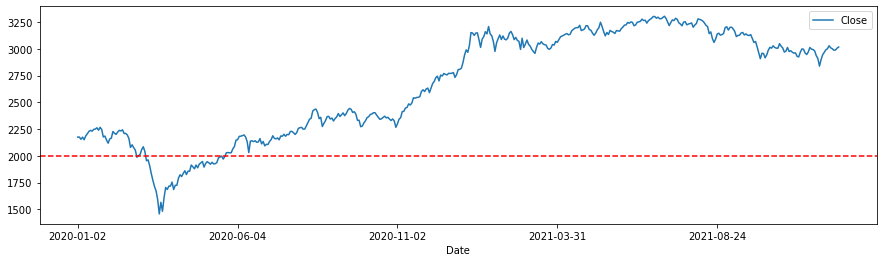

In [18]:
plt.figure() #도화지 생성

df_kospi.plot(figsize=(15,4)) #데이터를 가져와서 그려주겠다. figsize(가로,세로) 단위는 inch

plt.axhline(2000,linestyle='--',color='red') #

plt.show()


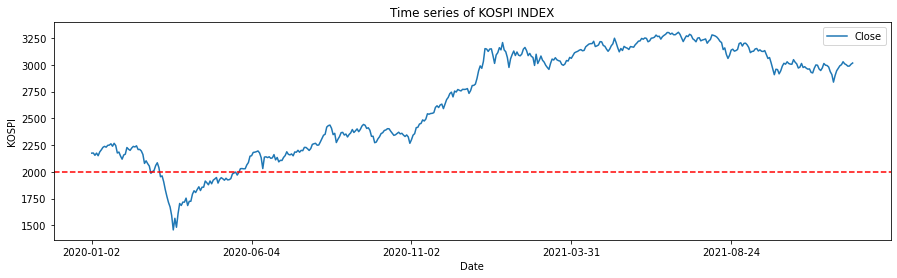

In [19]:
fig, ax=plt.subplots() #fig-> 그림을 생성할 것, ax=뒤에 나오는 코드로 생성하겠다/ 도화지 이름 = ax

df_kospi.plot(kind='line', ax=ax,figsize=(15,4))#ax라는 도화지에 코스피를 그린다/ kind='line'은 디폴트 값임

ax.set(xlabel='Date',ylabel='KOSPI',title='Time series of KOSPI INDEX') #set이라 하고 뒤에 xlabel,ylabel, title

ax.axhline(2000,linestyle='--',color='red') 

plt.show()

2개 이상의 그래프 그리기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_samsung=pd.read_excel('D:\정유재\금융데이터 분석을 위한 판다스 활용법\자료\Data\samsung_naver_excel.xlsx', sheet_name='samsung',index_col=0)
df_samsung

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Volume'),
 Text(0.5, 1.0, 'Time series of Samsung Volume')]

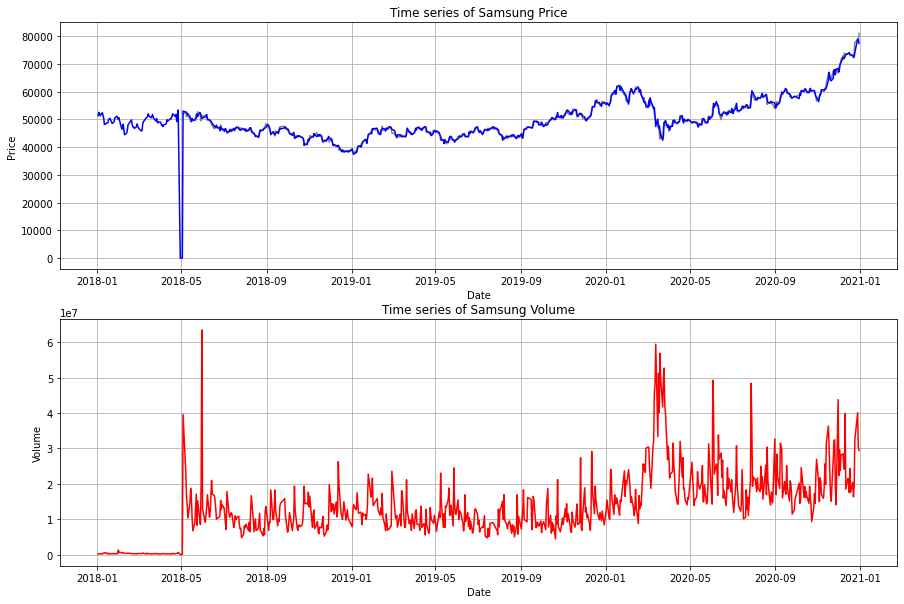

In [34]:
fig, ax1=plt.subplots(2,1,figsize=(15,10)) # subplots(행,열) ex)(2,1)이면 세로로 2개 가로로 1개의 그래프를 그린다는 이야기
# 만약 subplots(3,2)이렇게 되면 좌표를 (0,1) 이런식으로 줘야함

#첫번째 그래프 그리기
ax1[0].plot(df_samsung['Close']['2018-05-04':],color='grey') #.plot(넣을 데이터)/ 데이터값에[인덱스]로 기간 슬라이싱 가능!
ax1[0].grid(True) #grid는 세로 가로줄 네모칸으로 나눠주는거. grid(True,axis='x') 는 세로줄만, axis='y'는 가로줄만
ax1[0].set(xlabel='Date',ylabel='Price',title='Time series of Samsung Price')
# 칸 위에 그래프를 하나 더 그리고 싶어
ax1[0].plot(df_samsung['Open']['2018-05-04':],color='blue')

#두번째 그래프 그리기
ax1[1].plot(df_samsung['Volume'],color='red')
#ax1[1].scatter(df_samsung.index,df_samsung['Volume']) #scatter(인덱스값, y축 값)-> 점점이로 바뀜
ax1[1].grid(True)
ax1[1].set(xlabel='Date',ylabel='Volume',title='Time series of Samsung Volume')

시각화에 다양한 option을 넣어보자

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (20,14) #figuresize를 20,14 디폴트로 정해주기
plt.rcParams['font.size']=10

df_1=pd.read_excel('D:\정유재\금융데이터 분석을 위한 판다스 활용법\자료\Data\samsung_kospi_excel.xlsx', sheet_name='samsung',index_col=0)
df_1=df_1.loc['2018-01-02':] #데이터 보고 어디서부터 데이터를 사용할지 정하기

No handles with labels found to put in legend.


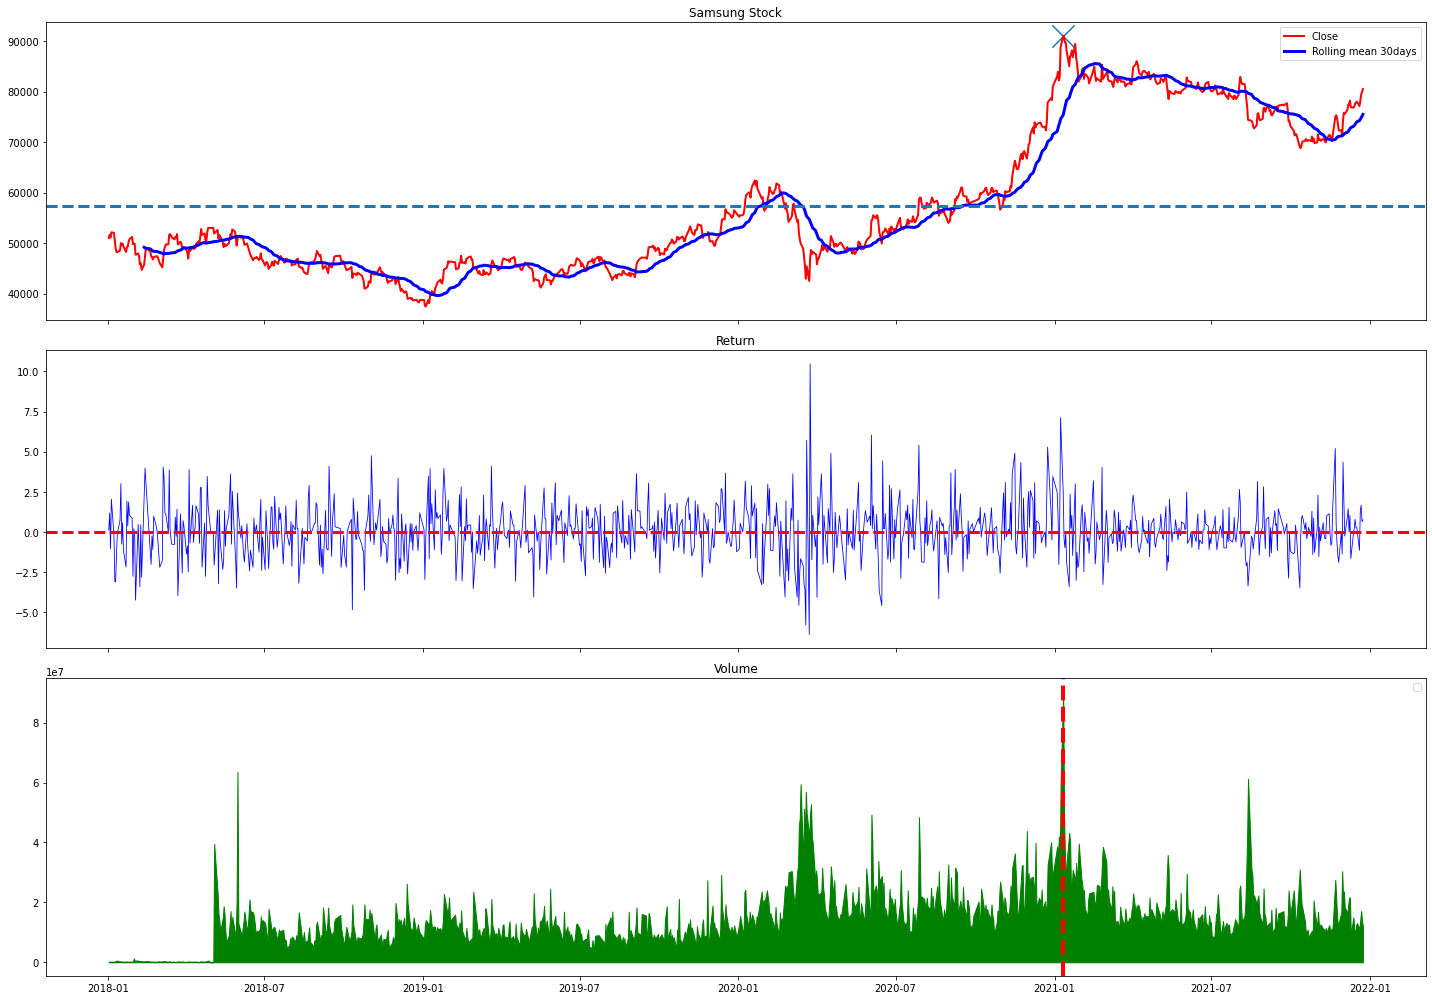

In [73]:
fig, ax2=plt.subplots(3,1,sharex=True) #어차피 가로축 다 똑같은데 하나로 볼 수 있게 하자!

ax2[0].plot(df_1['Close'],color='red',linewidth=2)
ax2[0].plot(df_1['Close'].rolling(window=30).mean(),color='blue',linewidth=3) #30이평선을 그려보기/ linewidth=선의 굵기 설정해주기
ax2[0].axhline(df_1['Close'].mean(),linestyle='--',linewidth=3) #가로로 종가의 평균에 선 긋기
ax2[0].scatter(df_1.index[df_1['Close'].argmax()],df_1['Close'].max(),marker='x',s=500) #scatter: 점 찍기 (x축, y축) s=점의 싸이즈, marker=구글에 찾아보면 이미지 많다
ax2[0].legend(['Close','Rolling mean 30days'])
ax2[0].set(title='Samsung Stock')

ax2[1].plot(df_1['Change']*100,color='blue',linewidth=0.8) 
ax2[1].set(title='Return')
ax2[1].axhline(0,linestyle='--',linewidth=3,color='red')
ax2[1].tick_params(axis='x',labelrotation=45) #x축 인덱스를 45도 기울여주기

ax2[2].fill_between(df_1.index,df_1['Volume'],color='green',alpha=1) #칠하기(x부터 y까지) alpha는 진함의 농도 높아질수록 진해
ax2[2].axvline(df_1.index[df_1['Volume'].argmax()],color='red',linewidth=4,linestyle='--') #세로로 선 긋기
ax2[2].set(title='Volume')
plt.tight_layout() # 글자들 안겹치게
plt.legend()
plt.show()